In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('total.csv', index_col=0)
data.reset_index(drop=True, inplace=True)
data.info()

---

In [ ]:
data.dropna(subset="comment",inplace=True)
data.drop_duplicates(inplace=True)
length=data[data["author"].isna()].shape[0]
data.loc[data["author"].isna(),"author"]=[f"author{i}" for i in range(length)]   
##lower case
data["comment"]=data["comment"].str.lower()

In [ ]:
data.isna().sum()

author     0
comment    0
dtype: int64

In [ ]:
data.shape

In [ ]:
## removing comments with at most 5 word
data.drop(data[data["comment"].apply(lambda x: len(x.split()))<=5].index,axis=0,inplace=True)

In [ ]:
data.shape

In [ ]:
# keep only comment which talk about our topics
topics=["workout","body","exercise",'working','work','leg','legs','protine','beginner',"gym",'fitness','gym guide',
'muscle','chest', 'shoulders', 'triceps','eat','weight','cardio','build','push','pull','deit','exercises',
'food',"nutrition",'meal','advice','healthy','fat','training','train','ab','routine','stretch','calorie','fast',
'fasting','intermittent','fruit','sugar','brain','energy','breakfast','morning','eating','health','surgery','drink'
,'water',"carb",'wake','blood','problem',"pressure",'cold shower','cigarette','heart','bread','egg','sleep',"symprom"
,'lower back','salt','eye','feeling','pain','quit smoking','smoker',"stress",'teeth','yoga','liver','dry eye','hair'
,'diabete']

topic_filter=data["comment"].str.contains(r"\b(" + "|".join(topics) + r")\b")
data.drop(data[~topic_filter].index,axis=0,inplace=True)
data.shape

In [ ]:
irrelevant=["thank","interesting","top","wonderful","fun","like","subscribe","love","awesome","great",
"amazing","cool","interesting","beautiful","nice","fantastic","wonderful","favorite","thanks"]

irrelevant_filter=data["comment"].str.contains(r"\b(" + "|".join(irrelevant) + r")\b")
length_filter=data["comment"].apply(lambda x: len(x.split()))<10

data[irrelevant_filter & length_filter].to_csv('ee.csv')

In [ ]:
data.drop(data[irrelevant_filter & length_filter].index,axis=0,inplace=True)
data.shape

In [ ]:
### removing emojis
import re

def remove_special_characters(text):
    # Remove emojis
    text = re.sub(r'\\[uU][\dA-Fa-f]{4}', '', text)
    
    # Remove other special characters
    text = re.sub(r'[^\w\s]', '', text)
    
    return text

data["comment"]=data["comment"].apply(remove_special_characters)

In [ ]:
import langid

def filter_non_english_comments(df):
    df['lang'] = df['comment'].apply(lambda x: langid.classify(x)[0])
    df = df[df['lang'] == 'en'].copy()
    df.drop('lang', axis=1, inplace=True)
    return df

# Example usage
filtered_df = filter_non_english_comments(data)


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re

# Download stopwords and lemmatizer data and punkt
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    
    # Degits and Punctuation removal and lowercase
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r"\d+", "", text)
    text = text.lower()
    
    # Tokenize text into words
    tokens = word_tokenize(text)

    # Remove stopwords
    additional_stopwords = list(set(['u','im','dr','berg','enough','use','want','thats','said','sometime','thank','see','much',
                                'go','find','make','one','day','think','month','year','maybe','week','youre',"going","make","thing",
                                'especially','u','mean','hour','almost','used','ect','look','dont','doesnt','may',"etc","told","another",
                                'easy','right','well','give','age','cant','lot','ive','love','still','dr berg',"last",'amazing',"didnt",
                                'end','many','went','know','take','come','say','come','gon na','time','video','done',"alway",'little','hi',
                                'hour','true','year','ago','become','man','even','isnt','people','everything','literally','without','keto',
                                'really','thanks','made','seem',"got","ate","let",'getting','add','pretty','year','old','watch','ok','least',
                                'found','never','thought','le','put','idea',"hard","every",'starting',"keep","person",'feeling',"someone", "god",
                                'day','bad','guy','trying','started','understand','new','anuone',"able",'lol','due',"big",'live',"two",       
                                'month','gon','na','sometimes','best',"happy","least",'felt','daily','hole','last',"amazing",'definitely',
                                "tried",'part','hope','long','fast','please','half','kind',"important",'reason',"instead",'stuff','great',
                                'making','away','today','using','tell','told','week','normal','something','feel',"month",'day','year','years'
                                ,'actually','added',"already",'also','always','amount',"anyone",'anything','around',"appreciate",'different'
                                ,'bit',"bp","bro",'gave','lb',"need",'like','oat',"get",'help','pm','stop']))

    stop_words = set(stopwords.words('english'))
    stop_words.update(additional_stopwords )
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    tokens = [lemmatizer.lemmatize(word,pos="v") for word in tokens]

    
    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text


[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [ ]:
filtered_df["without_stop_words"]=filtered_df["comment"].apply(preprocess_text)

In [52]:
filtered_df.reset_index(inplace=True)

(-0.5, 799.5, 599.5, -0.5)

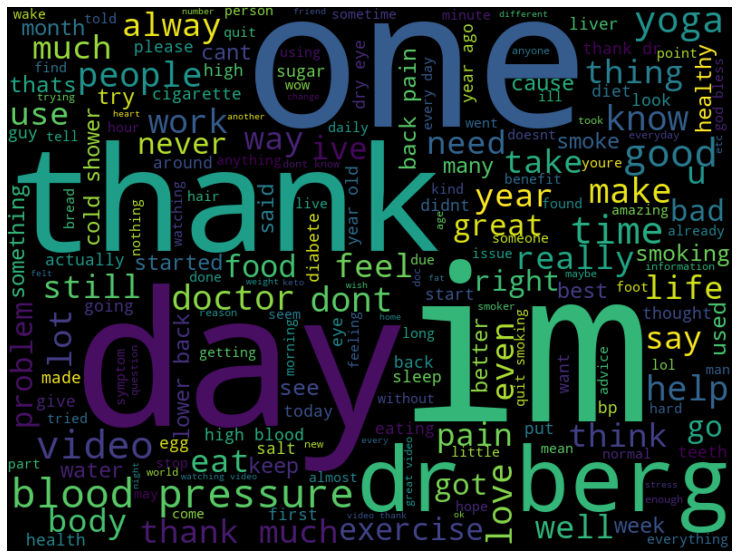

In [53]:
import matplotlib
import pylab as plt

from wordcloud import WordCloud
# Generate a word cloud image
wordcloud = WordCloud(width=800, height=600).generate(" ".join(grouped_df['without_stop_words']))
plt.figure(figsize=(16,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [ ]:
# join all comments of the same author
grouped_df = filtered_df.groupby('author').agg({'without_stop_words': '/n'.join})

In [ ]:
grouped_df.reset_index(inplace=True)
grouped_df.drop('index', axis=1, inplace=True)

In [ ]:
#this filter is needed for BERT encoding because it doesn't accept more than 512 characters
grouped_df['without_stop_words']=grouped_df['without_stop_words'].apply(lambda x: x[:512] if len(x)>512 else x)

In [ ]:
grouped_df.to_csv('tot.csv')